# Project - Used Cars Prediction 

In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
import os
os.chdir("/Users/bharathchandran/Desktop/data mining Lab/datasets")

# 1. Importing Dataset

In [4]:
auto= pd.read_csv('autos.csv', encoding = "ISO-8859-1")

In [5]:
auto.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24/03/16 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,24/03/16 0:00,0,70435,07/04/16 3:16
1,24/03/16 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,24/03/16 0:00,0,66954,07/04/16 1:46
2,14/03/16 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,14/03/16 0:00,0,90480,05/04/16 12:47
3,17/03/16 16:54,GOLF_4_1_4__3T RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,17/03/16 0:00,0,91074,17/03/16 17:40
4,31/03/16 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,31/03/16 0:00,0,60437,06/04/16 10:17


In [6]:
print(auto.shape)

(31172, 20)


In [7]:
auto.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.117200e+04,31172.000000,31172.000000,31172.000000,31172.000000,31172.0,31172.000000
mean,6.902889e+03,2005.079206,113.313198,125606.152958,5.741467,0.0,50796.607917
std,1.105714e+05,111.383845,122.117670,40124.010448,3.717355,0.0,25911.346481
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,0.0,30173.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49636.000000
75%,7.199000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71697.250000
max,1.234568e+07,9999.000000,10520.000000,150000.000000,12.000000,0.0,99994.000000


# 1.1 Missing Values

In [7]:
auto.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            3286
yearOfRegistration        0
gearbox                1702
powerPS                   0
model                  1718
kilometer                 0
monthOfRegistration       0
fuelType               2883
brand                     0
notRepairedDamage      6091
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [8]:
auto["seller"].value_counts()

privat    31172
Name: seller, dtype: int64

In [9]:
del auto["seller"]

In [10]:
auto["offerType"].value_counts()

Angebot    31171
Gesuch         1
Name: offerType, dtype: int64

In [11]:
auto.head(3) 

,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24/03/16 11:52,Golf_3_1.6,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,24/03/16 0:00,0,70435,07/04/16 3:16
1,24/03/16 10:58,A5_Sportback_2.7_Tdi,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,24/03/16 0:00,0,66954,07/04/16 1:46
2,14/03/16 12:52,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,14/03/16 0:00,0,90480,05/04/16 12:47


In [12]:
auto["nrOfPictures"].value_counts()

0    31172
Name: nrOfPictures, dtype: int64

In [13]:
del auto["nrOfPictures"]

In [14]:
auto["abtest"].value_counts()

test       16148
control    15024
Name: abtest, dtype: int64

In [15]:
auto[ ["dateCrawled","dateCreated","lastSeen"] ].head()

,dateCrawled,dateCreated,lastSeen
0,24/03/16 11:52,24/03/16 0:00,07/04/16 3:16
1,24/03/16 10:58,24/03/16 0:00,07/04/16 1:46
2,14/03/16 12:52,14/03/16 0:00,05/04/16 12:47
3,17/03/16 16:54,17/03/16 0:00,17/03/16 17:40
4,31/03/16 17:25,31/03/16 0:00,06/04/16 10:17


In [16]:
auto= auto.drop(["dateCrawled","dateCreated","lastSeen"] , axis=1 )

In [17]:
auto.head()

,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
1,A5_Sportback_2.7_Tdi,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,66954
2,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3T RER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


In [18]:
del auto["name"]

In [19]:
#deleted unwanted columns and now dealing with Missing values

auto.isnull().sum()

offerType                 0
price                     0
abtest                    0
vehicleType            3286
yearOfRegistration        0
gearbox                1702
powerPS                   0
model                  1718
kilometer                 0
monthOfRegistration       0
fuelType               2883
brand                     0
notRepairedDamage      6091
postalCode                0
dtype: int64

In [20]:
#Filling Gearbox values with brand attributes

auto["gearbox"].value_counts()

manuell      23152
automatik     6318
Name: gearbox, dtype: int64

In [21]:
auto["brand"].isnull().sum()

0

In [22]:
auto.groupby("brand")["gearbox"].value_counts()

brand           gearbox  
alfa_romeo      manuell       150
                automatik       8
audi            manuell      1759
                automatik     866
bmw             manuell      2155
                automatik    1130
chevrolet       manuell        87
                automatik      51
chrysler        automatik      55
                manuell        55
citroen         manuell       394
                automatik      57
dacia           manuell        69
daewoo          manuell        36
                automatik       3
daihatsu        manuell        48
                automatik       6
fiat            manuell       737
                automatik      21
ford            manuell      1852
                automatik     161
honda           manuell       187
                automatik      32
hyundai         manuell       239
                automatik      24
jaguar          automatik      41
                manuell         9
jeep            automatik      40
                manuel

In [23]:
gearbox = auto["gearbox"].unique()
brand = auto["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if auto[(auto.gearbox == j) & (auto.brand == i)].shape[0] > m :
            m = auto[(auto.gearbox == j) & (auto.brand == i)].shape[0]
            d[i] = j

In [24]:
for i in brand :
    auto.loc[(auto.brand == i) & (auto.gearbox.isnull()) ,"gearbox" ] = d[i]

In [25]:
auto["gearbox"].isnull().sum()

0

In [26]:
#Filling notrepaireddamage values with fueltype attributes

auto["notRepairedDamage"].value_counts()

nein    21988
ja       3093
Name: notRepairedDamage, dtype: int64

In [27]:
auto["notRepairedDamage"].isnull().sum()

6091

In [28]:
auto["notRepairedDamage"].fillna("nein",inplace = True)

In [29]:
auto["notRepairedDamage"].isnull().sum()

0

In [30]:
auto["fuelType"].value_counts()

benzin     18592
diesel      9156
lpg          439
cng           54
hybrid        19
andere        19
elektro       10
Name: fuelType, dtype: int64

In [31]:
#Vehicle type with fueltype with Vehicle type

auto["fuelType"].fillna("benzin",inplace = True)

In [32]:
auto.isnull().sum()

offerType                 0
price                     0
abtest                    0
vehicleType            3286
yearOfRegistration        0
gearbox                   0
powerPS                   0
model                  1718
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
notRepairedDamage         0
postalCode                0
dtype: int64

In [33]:
auto["vehicleType"].value_counts()

limousine     8030
kleinwagen    6671
kombi         5688
bus           2540
cabrio        1891
coupe         1567
suv           1208
andere         291
Name: vehicleType, dtype: int64

In [34]:
auto.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    andere            6
          limousine         6
          kleinwagen        3
          bus               1
          kombi             1
          suv               1
benzin    kleinwagen     6040
          limousine      5528
          kombi          2631
          cabrio         1710
          coupe          1290
          bus             894
          suv             447
          andere          133
cng       kombi            17
          bus              16
          kleinwagen        6
          limousine         5
          andere            1
diesel    kombi          2949
          limousine      2323
          bus            1592
          suv             709
          kleinwagen      581
          coupe           250
          cabrio          161
          andere          145
elektro   kleinwagen        4
          andere            2
          coupe             2
          limousine         1
hybrid    limousine        13
          kleinwag

In [35]:
vehicleType = auto["vehicleType"].unique()
fuelType = auto["fuelType"].unique()
print(fuelType)
print(vehicleType)

['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [36]:
vehicleType = np.delete(vehicleType,0)

In [37]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if auto[(auto.vehicleType == j) & (auto.fuelType == i)].shape[0] > m :
            m = auto[(auto.vehicleType == j) & (auto.fuelType == i)].shape[0]
            d[i] = j

In [38]:
for i in fuelType :
    auto.loc[(auto.fuelType == i) & (auto.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [39]:
auto["vehicleType"].isnull().sum()

0

In [40]:
auto.isnull().sum()

offerType                 0
price                     0
abtest                    0
vehicleType               0
yearOfRegistration        0
gearbox                   0
powerPS                   0
model                  1718
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
notRepairedDamage         0
postalCode                0
dtype: int64

In [41]:
len(auto["model"].unique())

244

In [42]:
auto["model"].unique()[0]

'golf'

In [43]:
auto["model"].fillna("golf",inplace =True)

In [44]:
auto.isnull().sum()

offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dtype: int64

In [45]:
auto.head()

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Angebot,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,70435
1,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,66954
2,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,90480
3,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


In [46]:
auto["postalCode"].head()

0    70435
1    66954
2    90480
3    91074
4    60437
Name: postalCode, dtype: int64

In [47]:
del auto["postalCode"]

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
data = auto.copy()

In [50]:
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["model"] =LabelEncoder().fit_transform(data["model"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])

# 1.2 removal of outliers

In [51]:
data["yearOfRegistration"].describe()

count    31172.000000
mean      2005.079206
std        111.383845
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: yearOfRegistration, dtype: float64

In [52]:
data[data.yearOfRegistration > 2017].shape

(355, 13)

In [53]:
data[data.yearOfRegistration < 1950].shape

(23, 13)

In [54]:
data = data[(data.yearOfRegistration < 2017)  & (data.yearOfRegistration > 1950)]

In [55]:
data["price"].describe()

count    2.986900e+04
mean     7.046890e+03
std      1.129501e+05
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.350000e+03
max      1.234568e+07
Name: price, dtype: float64

In [56]:
data[data.price < 100].shape

(1080, 13)

In [57]:
data[data.price > 200000].shape

(11, 13)

In [58]:
data = data[(data.price > 100) & (data.price < 200000) ]

# 1.3 Univariate analysis

In [59]:
import math
import matplotlib
%matplotlib inline

def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

gearbox
1    22550
0     6155
Name: gearbox, dtype: int64


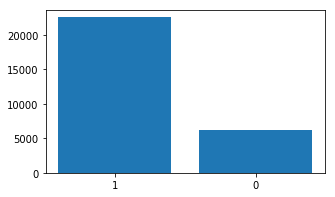

model
116    3532
40     2008
11     1648
168     973
84      917
Name: model, dtype: int64


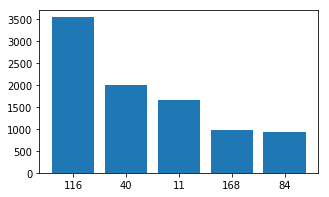

brand
38    5973
2     3200
24    3012
20    2798
1     2589
Name: brand, dtype: int64


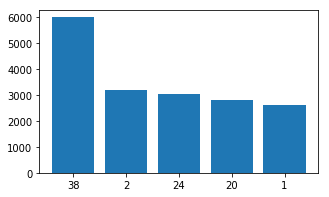

vehicleType
4    7838
6    7821
5    5750
1    2488
2    1864
Name: vehicleType, dtype: int64


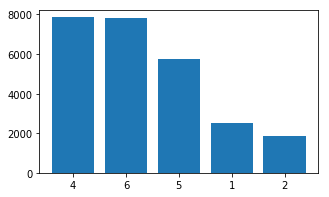

fuelType
1    19408
3     8794
6      416
2       48
5       18
Name: fuelType, dtype: int64


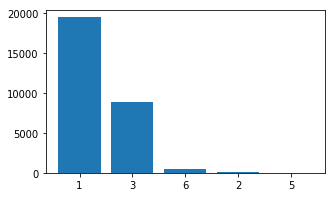

notRepairedDamage
1    25969
0     2736
Name: notRepairedDamage, dtype: int64


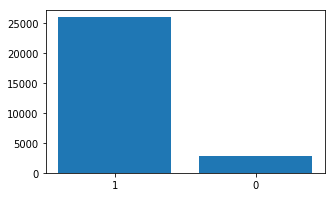

In [60]:
import matplotlib.pyplot as plt
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = data[c].unique()
    
    g = data.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

# 1.4 Correlation

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
price,1.000000,-0.006280,-0.008612,0.342403,-0.286820,0.335980,-0.022800,-0.417088,0.059648,0.169346,-0.097509,0.146769
abtest,-0.006280,1.000000,0.008835,-0.016656,-0.002566,-0.008493,-0.002054,0.003427,-0.002210,-0.003601,0.004822,0.003921
vehicleType,-0.008612,0.008835,1.000000,0.010015,-0.112219,0.071344,-0.179506,0.043780,0.030339,0.043683,-0.130048,0.002695
yearOfRegistration,0.342403,-0.016656,0.010015,1.000000,-0.089875,0.129331,0.049076,-0.296146,0.062788,0.231593,-0.047871,0.097085
gearbox,-0.286820,-0.002566,-0.112219,-0.089875,1.000000,-0.250133,0.052268,0.044500,-0.043227,-0.166625,0.122371,-0.026495
powerPS,0.335980,-0.008493,0.071344,0.129331,-0.250133,1.000000,-0.083266,-0.019778,0.060530,0.115682,-0.165592,0.042338
model,-0.022800,-0.002054,-0.179506,0.049076,0.052268,-0.083266,1.000000,-0.020730,-0.004379,0.028301,0.480387,-0.007554
kilometer,-0.417088,0.003427,0.043780,-0.296146,0.044500,-0.019778,-0.020730,1.000000,-0.010437,0.105170,-0.028648,-0.086920
monthOfRegistration,0.059648,-0.002210,0.030339,0.062788,-0.043227,0.060530,-0.004379,-0.010437,1.000000,0.083580,-0.017764,0.022581
fuelType,0.169346,-0.003601,0.043683,0.231593,-0.166625,0.115682,0.028301,0.105170,0.083580,1.000000,-0.056961,0.028627


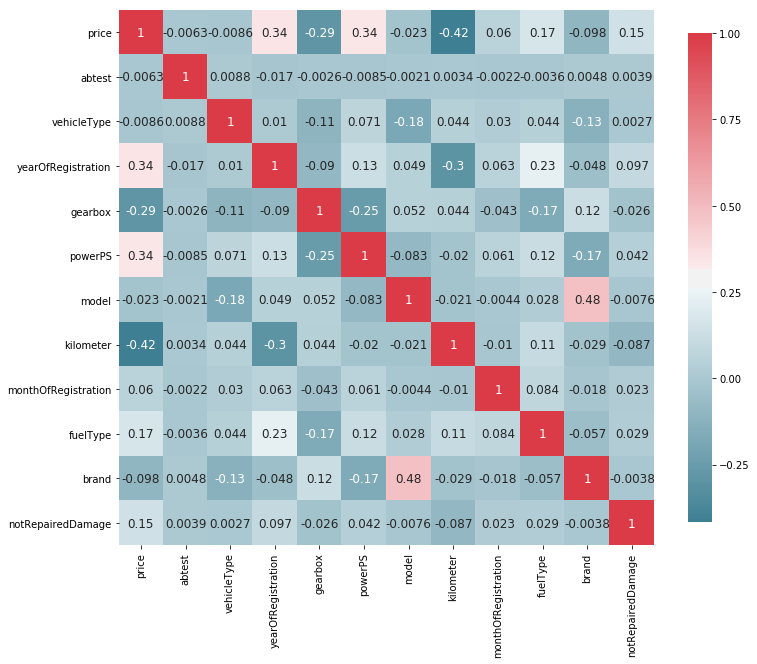

In [61]:
plot_correlation_map(data)
data.corr()

In [62]:
data.head()

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Angebot,480,1,4,1993,1,0,116,150000,0,1,38,1
1,Angebot,18300,1,3,2011,1,190,116,125000,5,3,1,0
2,Angebot,9800,1,7,2004,0,163,117,125000,8,3,14,1
3,Angebot,1500,1,4,2001,1,75,116,150000,6,1,38,1
4,Angebot,3600,1,4,2008,1,69,101,90000,7,3,31,1


In [63]:
data.shape

(28705, 13)

In [69]:
del data["offerType"]

In [70]:
data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,1,4,1993,1,0,116,150000,0,1,38,1
1,18300,1,3,2011,1,190,116,125000,5,3,1,0
2,9800,1,7,2004,0,163,117,125000,8,3,14,1
3,1500,1,4,2001,1,75,116,150000,6,1,38,1
4,3600,1,4,2008,1,69,101,90000,7,3,31,1


# 2. Splitting of data

In [72]:
# Explanatory variable
X = data.loc[:,data.columns != 'price']

# Target variable
Y = data.loc[:,data.columns == 'price']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# 3. Model Building and Evaluation


# 3.1 Linear Regression

In [114]:
lm = LinearRegression()
reg = lm.fit(x_train, y_train)

In [115]:
final_pred = reg.predict(x_test)

In [116]:
#Evaluation of the prediction

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, final_pred)
mse = mean_squared_error(y_test, final_pred)
r2 = r2_score(y_test, final_pred)

print('Mean absolute error: ', mae)
print('Mean squared error:', mse)
print('r2 score:', r2)

Mean absolute error:  3305.2986928715063
Mean squared error: 43009828.42312199
r2 score: 0.3428659078787273


# 3.2 Random Forest

In [96]:
forest_reg = RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30 )
forest_reg.fit(x_train, y_train)

/Users/bharathchandran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [97]:
#Evaluation of the prediction

from sklearn.metrics import mean_squared_error


final_predictions = forest_reg.predict(x_test)

mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print('Mean absolute error: ', mae)
print('Mean squared error:', mse)
print('r2 score:', r2)

Mean absolute error:  1599.3555507896929
Mean squared error: 12892075.30856569
r2 score: 0.8030259009613031


# 4. Model Comparisons

In [111]:
#Creating a dataframe for Random forest results

RF_results = pd.DataFrame({'algorithm':['RandomForestRegressor'],
            'MSE': [mean_squared_error(y_test, final_predictions)],
            'MAE': [mean_absolute_error(y_test, final_predictions)],
            'r2_score': [r2_score(y_test, final_predictions)],})
RF_results

,algorithm,MSE,MAE,r2_score
0,RandomForestRegressor,1.289208e+07,1599.355551,0.803026


In [117]:
#Creating a dataframe for linear regression results

LR_results = pd.DataFrame({'algorithm':['LinearRegression'],
            'MSE': [mean_squared_error(y_test, final_pred)],
            'MAE': [mean_absolute_error(y_test, final_pred)],
            'r2_score': [r2_score(y_test, final_pred)],})
LR_results

,algorithm,MSE,MAE,r2_score
0,LinearRegression,4.300983e+07,3305.298693,0.342866


In [118]:
pd.concat([LR_results, RF_results], axis=0, ignore_index=True)

,algorithm,MSE,MAE,r2_score
0,LinearRegression,4.300983e+07,3305.298693,0.342866
1,RandomForestRegressor,1.289208e+07,1599.355551,0.803026
